To connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Pandas for This line imports the pandas library, which provides data manipulation and analysis tools.
NumPy is usually imported under the np alias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #this for Visualization
import seaborn as sns #to make statistical graphics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels



This will be our data set came from google drive.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/sentimentdataset.csv') #this will be our data sentiment data set

In [4]:
df.head() #To show Few rows for our dataframe

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,15/01/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,15/01/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,15/01/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,15/01/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15/01/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [5]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore') #to remove this column in our dataset

In [6]:
df.info() #Check the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       732 non-null    object
 1   Sentiment  732 non-null    object
 2   Timestamp  732 non-null    object
 3   User       732 non-null    object
 4   Platform   732 non-null    object
 5   Hashtags   732 non-null    object
 6   Retweets   732 non-null    int64 
 7   Likes      732 non-null    int64 
 8   Country    732 non-null    object
 9   Year       732 non-null    int64 
 10  Month      732 non-null    int64 
 11  Day        732 non-null    int64 
 12  Hour       732 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 74.5+ KB


In [7]:
df.shape #The 732 is to show the number of rows and 13 is to show the number of Columns.

(732, 13)

In [8]:
df.isnull().sum() #searching for null values

,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0
Year,0


Distinct VALUES FOR OUR DATA

In [9]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values") #distinct values means it repeats several times

Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


In [10]:
df = df.drop(columns=['Day', 'Hour','Timestamp'], errors='ignore') #Remove useless Columns

In [11]:
df.head()  #To show Few rows for our dataframe

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month
0,Enjoying a beautiful day at the park! ...,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,1
1,Traffic was terrible this morning. ...,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1
2,Just finished an amazing workout! 💪 ...,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1
3,Excited about the upcoming weekend getaway! ...,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1
4,Trying out a new recipe for dinner tonight. ...,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1


Manual labeling

In [12]:
def map_sentiment(label):
    label = str(label).strip().lower()

    if any(word in label for word in ["joy", "happiness", "love", "admiration", "excitement", "hope", "gratitude", "euphoria",
    "affection", "elation", "contentment", "curiosity", "inspiration", "confidence",
    "pride", "enthusiasm", "serenity", "freedom", "kind", "fun", "amusement", "playful", "empowerment",
    "accomplishment", "success", "awe", "wonder", "blessed", "zest", "cheerful","positive"]):
        return "positive"
    elif any(word in label for word in [  "anger", "fear", "sadness", "disgust", "disappointed", "grief", "despair", "loneliness", "regret",
    "envy", "jealousy", "frustration", "isolation", "boredom", "resentment", "bitterness", "sorrow",
    "hate", "heartbreak", "loss", "betrayal", "devastated", "numbness", "dismay", "desolation", "darkness","negative"]):
        return "negative"
    elif any(word in label for word in ["neutral", "acceptance", "reflection", "ambivalence", "calmness", "contemplation", "serenity", "mindfulness","neutral"]):
        return "neutral"
    else:
      return "neutral"

In [13]:
df['mapped_sentiment'] = df['Sentiment'].apply(map_sentiment)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [14]:
print(df[['mapped_sentiment']])

    mapped_sentiment
0           positive
1           negative
2           positive
3           positive
4            neutral
5           positive
6           positive
7           positive
8           negative
9            neutral
10          positive
11          negative
12          positive
13          positive
14           neutral
15          positive
16          positive
17          positive
18           neutral
19          negative
20          positive
21          positive
22          positive
23          positive
24          positive
25          positive
26          positive
27          positive
28          positive
29          positive
30          positive
31          positive
32          positive
33          positive
34          positive
35          positive
36          positive
37          positive
38          positive
39          positive
40          positive
41          positive
42          positive
43          positive
44          positive
45          positive
46          p

In [15]:
df.columns #To show All Columns

Index(['Text', 'Sentiment', 'User', 'Platform', 'Hashtags', 'Retweets',
       'Likes', 'Country', 'Year', 'Month', 'mapped_sentiment'],
      dtype='object')

In [16]:
#Go through each column in the DataFrame that contains text data
text_columns = df.select_dtypes(include=['object']).columns

for column in text_columns:
    df[column] = df[column].str.strip()  #Remove spaces at the beginning and end of each value in this column

In [17]:
month_mapping = {

    1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'
}
df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

**Counts the Columns.** or count the unqiue values

In [18]:
for column in df.columns:

    print("Value counts for :",column)
    print(df[column].value_counts())
    print("\n")

Value counts for : Text
Text
A compassionate rain, tears of empathy falling gently, nurturing the seeds of kindness in the garden of human connections.                                      3
Proudly scaling the peaks of achievement, a mountaineer conquering challenges and planting the flag of success.                                                 3
Embraced by the hopeful dawn, a gardener sowing seeds of optimism, tending to the blooms of a brighter tomorrow.                                                3
A playful escapade in the carnival of life, carousel laughter and cotton candy dreams swirling in the joyous atmosphere.                                        3
Loneliness, a silent companion in the night, the only echo in the chamber of solitude, a heart's solitary nocturne.                                             2
Shattered dreams lie on the floor like fragments of glass, a mosaic of disappointment crafted by the hands of frustration.                                      2

**MAKE A BARPLOT AND SCATTER**

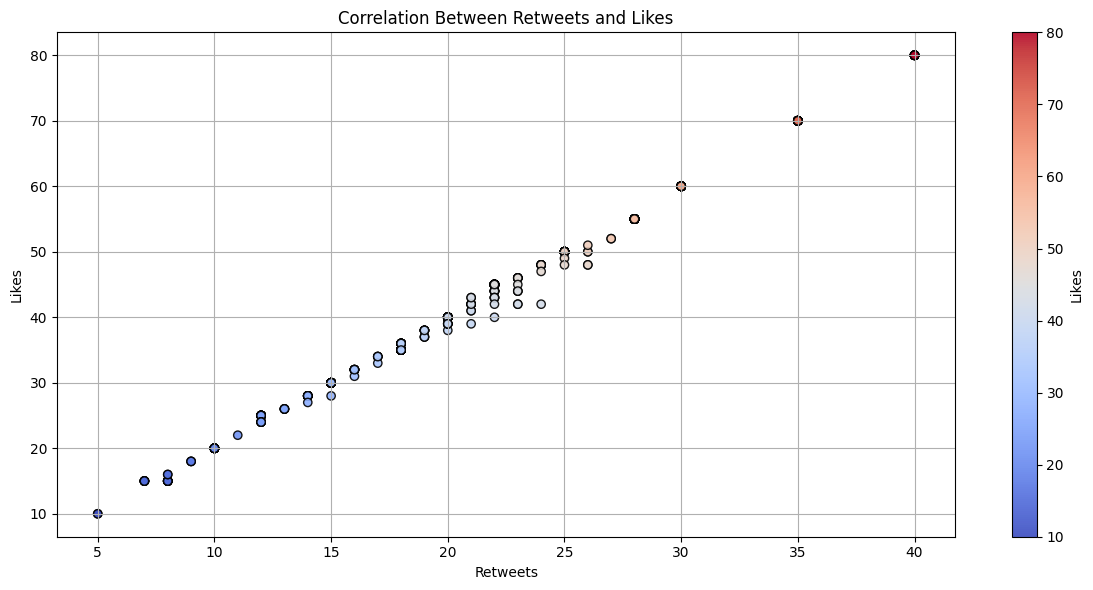

In [19]:
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    df["Retweets"],
    df["Likes"],
    c=df["Likes"],# Color by number of likes
    cmap="coolwarm",# You can change this to 'plasma', 'coolwarm', etc.
    alpha=0.9, # Transparency
    edgecolor='k' # Outline color for better visibility
)

plt.title("Correlation Between Retweets and Likes")
plt.xlabel("Retweets")
plt.ylabel("Likes")

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Likes")

plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3185533861.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=Mapped_Sentiment, y=VALUES, palette=colors)


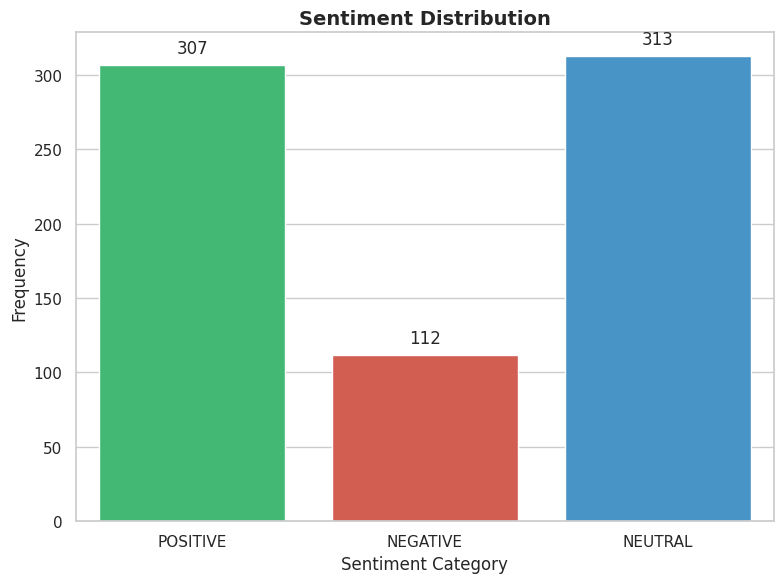

In [20]:
Mapped_Sentiment = ['POSITIVE', 'NEGATIVE', 'NEUTRAL']
VALUES = [307, 112, 313]

sns.set_theme(style="whitegrid")

colors = ['#2ecc71', '#e74c3c', '#3498db']  # green, red, blue

plt.figure(figsize=(8, 6))
bars = sns.barplot(x=Mapped_Sentiment, y=VALUES, palette=colors)

for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 5,
             f'{VALUES[i]}', ha='center', va='bottom', fontsize=12)

plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Sentiment Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

In [21]:
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,mapped_sentiment
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,Jan,positive
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,Jan,negative
2,Just finished an amazing workout! 💪,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,Jan,positive
3,Excited about the upcoming weekend getaway!,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,Jan,positive
4,Trying out a new recipe for dinner tonight.,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,Jan,neutral


In [22]:
df.shape

(732, 11)

In [23]:
df.head()

,Text,Sentiment,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,mapped_sentiment
0,Enjoying a beautiful day at the park!,Positive,User123,Twitter,#Nature #Park,15,30,USA,2023,Jan,positive
1,Traffic was terrible this morning.,Negative,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,Jan,negative
2,Just finished an amazing workout! 💪,Positive,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,Jan,positive
3,Excited about the upcoming weekend getaway!,Positive,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,Jan,positive
4,Trying out a new recipe for dinner tonight.,Neutral,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,Jan,neutral


In [24]:
df.shape

(732, 11)

In [25]:
print(df.to_string(index=False))

                                                                                                                                                        Text            Sentiment                                  User  Platform                                    Hashtags  Retweets  Likes        Country  Year Month mapped_sentiment
                                                                                                                       Enjoying a beautiful day at the park!             Positive                               User123   Twitter                               #Nature #Park        15     30            USA  2023   Jan         positive
                                                                                                                          Traffic was terrible this morning.             Negative                             CommuterX   Twitter                           #Traffic #Morning         5     10         Canada  2023   Jan         negative
       

In [26]:
df.shape

(732, 11)

In [27]:
df.to_csv('oldtonew_data.csv', index=False)

TF-IDF Vectorization of text

In [28]:
df = pd.read_csv('/content/oldtonew_data.csv') #this will be our data sentiment data set

In [29]:
texts = df['Text'].astype(str).str.strip()

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(texts)

In [30]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5767 stored elements and shape (732, 2389)>
  Coords	Values
  (0, 675)	0.5057349639684287
  (0, 155)	0.5358462153705669
  (0, 513)	0.38492861406956697
  (0, 1455)	0.5558155645206193
  (1, 2150)	0.602784187649895
  (1, 2089)	0.602784187649895
  (1, 1333)	0.5227833645388041
  (2, 1131)	0.4299677728657505
  (2, 812)	0.5277416097347611
  (2, 55)	0.5606691635746824
  (2, 2361)	0.4714515846488326
  (3, 716)	0.5501575582682272
  (3, 2241)	0.44016191639084945
  (3, 2318)	0.44823075476791996
  (3, 909)	0.5501575582682272
  (4, 2184)	0.43848981909876694
  (4, 1374)	0.30671107413119963
  (4, 1631)	0.47584082603568134
  (4, 567)	0.49357395789774855
  (4, 2135)	0.49357395789774855
  (5, 781)	0.32821922482652616
  (5, 949)	0.4958824582886156
  (5, 1213)	0.5268222137340454
  (5, 2102)	0.5268222137340454
  (5, 1195)	0.30214142094164026
  :	:
  (729, 306)	0.33924639620279673
  (729, 390)	0.3068901762699945
  (729, 2006)	0.33924639620279673
 

**Label Encoding**

In [31]:
le = LabelEncoder()
y = le.fit_transform(df['mapped_sentiment'])

In [32]:
print(y)

[2 0 2 2 1 2 2 2 0 1 2 0 2 2 1 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 1 2 2
 2 1 0 0 0 0 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 2 1 1 1 2 1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 2 2 2 2 2 2 2 2 1 1 1 2 1
 1 2 2 2 2 2 2 2 1 1 1 2 1 1 2 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 2 1 1 0 1 1 1 1 1 2 2 1 1 0 1 1 1 1 1 2 2 1 1 0 1 1
 1 1 1 2 1 1 0 1 1 1 1 1 2 2 1 1 0 1 1 1 1 1 2 2 0 2 2 2 1 1 1 1 2 1 1 2 1
 2 2 1 1 2 1 1 2 2 1 2 1 1 1 1 2 2 1 2 1 1 2 2 1 2 1 1 1 1 2 2 1 2 1 1 2 2
 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 2
 1 1 1 1 1 2 2 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2 1 1 1 1 2 2 2 1 2 2 1 2 2 2 2
 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 2
 1 2 2 2 2 2 1 1 1 1 2 1 2 0 0 0 0 0 1 1 0 0 0 1 2 0 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 2 2 2 2 2 2 1 2 2 1 2
 2 2 1 2 2 2 2 2 1 1 1 2 

**Train/Test Split.**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(y_test.shape)

(147,)


In [35]:
from sklearn.linear_model import LogisticRegression

**Train a Classifier (Logistic Regression)**

In [36]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Evaluate the Model**

In [38]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(
    y_test, y_pred, labels=le.transform(le.classes_), target_names=le.classes_, zero_division=0
))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6122448979591837
Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.06      0.12        31
     neutral       0.54      0.73      0.62        56
    positive       0.69      0.78      0.73        60

    accuracy                           0.61       147
   macro avg       0.63      0.53      0.49       147
weighted avg       0.63      0.61      0.56       147

Confusion Matrix:
 [[ 2 23  6]
 [ 0 41 15]
 [ 1 12 47]]


LINEAR SVM

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #this for Visualization
import seaborn as sns #to make statistical graphics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels


In [40]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/sentimentdataset.csv') #this will be our data sentiment data set

In [41]:
texts = df['Text'].astype(str).str.strip()

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(texts)

In [42]:
X = df['Text']
y_raw = df['Sentiment']



Encode the labels


In [43]:
le = LabelEncoder()
y = le.fit_transform(y_raw)


Split the dataset this will be supervised

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



PIPELINE Bigram for Tfidf Vector and Linear SVM

In [45]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),  # Bigrams
    ('clf', LinearSVC())])

Train the model

In [46]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LinearSVC())])

Predict the model

In [47]:
y_pred = pipeline.predict(X_test)



Evaluate our Model

In [48]:
labels_used = unique_labels(y_test, y_pred)
target_names_used = le.inverse_transform(labels_used)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, labels=labels_used, target_names=target_names_used, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=labels_used))



Accuracy: 0.29931972789115646
Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
       Accomplishment        0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           1.00      1.00      1.00         1
      Ambivalence            1.00      1.00      1.00         1
         Amusement           0.00      0.00      0.00         0
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
      Anxiety                0.00      0.00      0.00         0
        Arousal              1.00      0.67      0.80         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      

1.Mount in the google drive.

2.Counts the Columns.

3.Distinct and Mapping Positive, Negative and Neutral.

4.Clean & Standardize Sentiment Labels.

5.Make a Bar Plot and Scatter.

6.TF-IDF Vectorization of Text.

7.Label Encoding.

8.Train/Test Split.

9.Train a Classifier (Logistic Regression ).

10.Evaluate the Model.

1.LINEAR SVM

2.Encode labels

3.Split the dataset this will be supervised

4.PIPELINE Bigram for Tfidf Vector and Linear SVM

5.Train the model

6.Evaluate our model